In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import backend as K

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
folder_benign_train = '/content/gdrive/MyDrive/data_rename/train/benign'
folder_insitu_train = '/content/gdrive/MyDrive/data_rename/train/insitu'
folder_invasive_train = '/content/gdrive/MyDrive/data_rename/train/invasive'
folder_later_train = '/content/gdrive/MyDrive/data_rename/train/later'

folder_benign_validation = '/content/gdrive/MyDrive/data_rename/test/benign'
folder_insitu_validation = '/content/gdrive/MyDrive/data_rename/test/insitu'
folder_invasive_validation = '/content/gdrive/MyDrive/data_rename/test/invasive'
folder_later_validation = '/content/gdrive/MyDrive/data_rename/test/later'

In [ ]:
train_path='/content/gdrive/MyDrive/data_rename/train'
validation_path='/content/gdrive/MyDrive/data_rename/test'

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

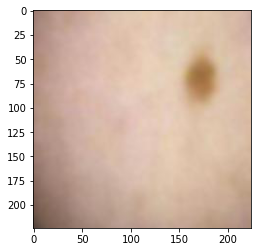

In [ ]:
img_path = '/content/gdrive/MyDrive/data_rename/train/benign/thumbnail_256(10) (2).jpg'
img = io.imread(img_path)
img.shape
plt.imshow(img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/train/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/train/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/train/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/train/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/test/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/test/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/test/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/gdrive/MyDrive/data_rename/test/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array((ims_benign), dtype='uint8')
ims_insitu = [read(os.path.join(folder_insitu_train, filename)) for filename in os.listdir(folder_insitu_train)]
X_insitu = np.array(ims_insitu, dtype='uint8')
ims_invasive = [read(os.path.join(folder_invasive_train, filename)) for filename in os.listdir(folder_invasive_train)]
X_invasive = np.array(ims_invasive, dtype='uint8')
ims_later = [read(os.path.join(folder_later_train, filename)) for filename in os.listdir(folder_later_train)]
X_later = np.array(ims_later, dtype='uint8')

dull razor


In [ ]:
import cv2
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

def dull_razor(data1):


    #Image cropping
    img=data1[30:410,30:560]
    #DULL RAZOR (REMOVE HAIR)

    #Gray scale
    grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )
    #Black hat filter
    kernel = cv2.getStructuringElement(1,(9,9))
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    #Gaussian filter
    #bhg= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
    #Binary thresholding (MASK)
    ret,mask = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    #Replace pixels of the mask
    dst = cv2.inpaint(img,mask,6,cv2.INPAINT_TELEA)



    #plt.figure(figsize=(11,6))
    #plt.subplot(141), plt.imshow(image, cmap='gray'),plt.title('Original')
    #plt.xticks([]), plt.yticks([])
    #plt.subplot(142), plt.imshow(grayScale, cmap='gray'),plt.title('blackhat')
    #plt.xticks([]), plt.yticks([])
    #plt.subplot(143), plt.imshow(mask, cmap='gray'),plt.title('mask')
    #plt.xticks([]), plt.yticks([])
    #plt.subplot(144), plt.imshow(dst, cmap='gray'),plt.title('final')
    #plt.xticks([]), plt.yticks([])
    #plt.show()

    return dst

#path = '/content/gdrive/My Drive/data/train/malignant_train/000ba687-b41b-43d3-b158-e84c3d538b84.jpg'
#image=io.imread(path)


In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = cv2.imread(f_img)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    new = dull_razor(img)
    #img = img.filter(ImageFilter.MedianFilter)
    cv2.imwrite(f_img,new)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/train/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image
from PIL import Image, ImageFilter

f = r'/content/gdrive/MyDrive/data_rename/test/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.MedianFilter)
    img.save(f_img)

In [ ]:
import pandas as pd
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224

#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'
# loading up our datasets
train_data_dir='/content/gdrive/MyDrive/data_rename/train'
validation_data_dir='/content/gdrive/MyDrive/data_rename/test'
# number of epochs to train top model
epochs = 7 #this has been changed after multiple model run
# batch size used by flow_from_directory and predict_generator
batch_size = 50

In [ ]:
#Loading vgc16 model
vgg16=applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255)
#needed to create the bottleneck .npy files

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
#train- creation of weights and features using vgg16
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print('Time: ', elapsed)

Found 3360 images belonging to 4 classes.


<ipython-input-47-c6ab365cfe62>:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)


Time:  0:29:57.032529


In [ ]:
#validation -creation of weights and features using vgg16
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_validation_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation)

np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 450 images belonging to 4 classes.


<ipython-input-48-1f7c383a8521>:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation)


Time:  0:04:22.334846


In [ ]:
start = datetime.datetime.now()
datagen_top = ImageDataGenerator(rescale=1./255)
generator_top = datagen_top.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

# load the bottleneck features saved earlier
train_data = np.load('bottleneck_features_train.npy')

# get the class lebels for the training data, in the original order
train_labels = generator_top.classes

# convert the training labels to categorical vectors
train_labels = to_categorical(train_labels, num_classes=num_classes)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Found 3360 images belonging to 4 classes.
Time:  0:00:00.347230


In [ ]:
generator_top = datagen_top.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_validation_samples = len(generator_top.filenames)

validation_data = np.load('bottleneck_features_validation.npy')


validation_labels = generator_top.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 450 images belonging to 4 classes.


In [ ]:
#method1
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
      epochs=5,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Epoch 1/5
68/68 [==============================] - 7s 89ms/step - loss: 2.4117 - accuracy: 0.3628 - val_loss: 1.2039 - val_accuracy: 0.5422
Epoch 2/5
68/68 [==============================] - 6s 88ms/step - loss: 1.1926 - accuracy: 0.4446 - val_loss: 1.1092 - val_accuracy: 0.5156
Epoch 3/5
68/68 [==============================] - 6s 88ms/step - loss: 1.0757 - accuracy: 0.5143 - val_loss: 1.0031 - val_accuracy: 0.6089
Epoch 4/5
68/68 [==============================] - 6s 85ms/step - loss: 0.9918 - accuracy: 0.5467 - val_loss: 0.9415 - val_accuracy: 0.5756
Epoch 5/5
9/9 [==============================] - 0s 21ms/step - loss: 0.9293 - accuracy: 0.5600
[INFO] accuracy: 56.00%
[INFO] Loss: 0.9292657375335693
Time:  0:00:42.204806


In [ ]:
#method2
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
      epochs=7,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Epoch 1/7


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


68/68 [==============================] - 4s 44ms/step - loss: 1.3817 - acc: 0.3000 - val_loss: 1.3458 - val_acc: 0.2489
Epoch 2/7
68/68 [==============================] - 3s 41ms/step - loss: 1.3332 - acc: 0.3524 - val_loss: 1.2914 - val_acc: 0.5578
Epoch 3/7
68/68 [==============================] - 3s 41ms/step - loss: 1.2766 - acc: 0.4080 - val_loss: 1.2514 - val_acc: 0.5178
Epoch 4/7
68/68 [==============================] - 3s 41ms/step - loss: 1.2404 - acc: 0.4396 - val_loss: 1.2011 - val_acc: 0.5733
Epoch 5/7
68/68 [==============================] - 3s 41ms/step - loss: 1.2076 - acc: 0.4524 - val_loss: 1.2301 - val_acc: 0.4933
Epoch 6/7
68/68 [==============================] - 3s 42ms/step - loss: 1.1670 - acc: 0.4777 - val_loss: 1.1136 - val_acc: 0.6000
Epoch 7/7
9/9 [==============================] - 0s 12ms/step - loss: 1.1029 - acc: 0.5844
[INFO] accuracy: 58.44%
[INFO] Loss: 1.102916955947876
Time:  0:00:21.478283


In [ ]:
#method3
import keras
from keras import optimizers
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
      epochs=7,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/7
68/68 [==============================] - 4s 43ms/step - loss: 1.3309 - acc: 0.3720 - val_loss: 1.1318 - val_acc: 0.4689
Epoch 2/7
68/68 [==============================] - 3s 42ms/step - loss: 1.0902 - acc: 0.5250 - val_loss: 1.0867 - val_acc: 0.5333
Epoch 3/7
68/68 [==============================] - 3s 43ms/step - loss: 0.9788 - acc: 0.5795 - val_loss: 1.0920 - val_acc: 0.5889
Epoch 4/7
68/68 [==============================] - 3s 42ms/step - loss: 0.9069 - acc: 0.6104 - val_loss: 0.8729 - val_acc: 0.5933
Epoch 5/7
68/68 [==============================] - 3s 42ms/step - loss: 0.8461 - acc: 0.6396 - val_loss: 0.8824 - val_acc: 0.6378
Epoch 6/7
68/68 [==============================] - 3s 42ms/step - loss: 0.8059 - acc: 0.6685 - val_loss: 0.9047 - val_acc: 0.5867
Epoch 7/7
9/9 [==============================] - 0s 12ms/step - loss: 0.8065 - acc: 0.6467
[INFO] accuracy: 64.67%
[INFO] Loss: 0.8064914345741272
Time:  0:00:21.147393


In [ ]:
#method4
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
      epochs=20,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/20
68/68 [==============================] - 6s 72ms/step - loss: 1.7028 - accuracy: 0.2557 - val_loss: 1.3812 - val_accuracy: 0.2844
Epoch 2/20
68/68 [==============================] - 5s 71ms/step - loss: 1.3700 - accuracy: 0.2973 - val_loss: 1.2860 - val_accuracy: 0.2822
Epoch 3/20
68/68 [==============================] - 7s 102ms/step - loss: 1.3361 - accuracy: 0.3098 - val_loss: 1.3453 - val_accuracy: 0.3311
Epoch 4/20
68/68 [==============================] - 6s 86ms/step - loss: 1.3113 - accuracy: 0.3372 - val_loss: 1.2100 - val_accuracy: 0.4667
Epoch 5/20
68/68 [==============================] - 6s 87ms/step - loss: 1.2975 - accuracy: 0.3455 - val_loss: 1.1741 - val_accuracy: 0.4711
Epoch 6/20
68/68 [==============================] - 7s 104ms/step - loss: 1.2841 - accuracy: 0.3565 - val_loss: 1.1585 - val_accuracy: 0.4978
Epoch 7/20
68/68 [==============================] - 8s 114ms/step - loss: 1.2764 - accuracy: 0.3562 - val_loss: 1.1581 - val_accuracy: 0.4556
Epoch 8/20

In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image


In [ ]:
def test_single_image(path):
    skin = ['benign', '', 'insitu', 'invasive', 'later']
    images = read_image(path)
    time.sleep(.5)

predict_prob=model.predict([testa,testb])

predict_classes=np.argmax(predict_prob,axis=1)
for idx, skin, x in zip(range(0,6), skin , preds[0]):
  print("ID: {}, Label: {} {}%".format(idx, skin, round(x*100,2) ))
  print('Final Decision:')
  time.sleep(.5)
  for x in range(3):
    print('.'*(x+1))
  time.sleep(.2)
  class_predicted = model.predict_classes(bt_prediction)
  class_dictionary = generator_top.class_indices
  inv_map = {v: k for k, v in class_dictionary.items()}
  print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))
return load_img(path)


NameError: ignored

In [ ]:

path = '/content/gdrive/MyDrive/data_rename/test/later/0c614c25-4068-4947-abaf-6840d2517e5c (2).jpg'

In [ ]:
test_single_image(path)

[INFO] loading and preprocessing image...
1/1 [==============================] - 1s 555ms/step


AttributeError: ignored

In [ ]:
image_path = '/content/gdrive/MyDrive/data_rename/test/later/0c614c25-4068-4947-abaf-6840d2517e5c (2).jpg'

orig = mpimg.imread(image_path)

print("[INFO] Image Loaded")
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)

# important! otherwise the predictions will be '0'
image = image / 255

image = np.expand_dims(image, axis=0)
# print(image)


[INFO] Image Loaded


In [ ]:
pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 18 kB/s 
     |████████████████████████████████| 6.0 MB 23.1 MB/s 
     |████████████████████████████████| 1.7 MB 28.2 MB/s 
     |████████████████████████████████| 439 kB 19.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
def fix_layer0(filename, batch_input_shape, dtype):
    with h5py.File(filename, 'r+') as f:
        model_config = json.loads(f.attrs['model_config'].decode('utf-8'))
        layer0 = model_config['config']['layers'][0]['config']
        layer0['batch_input_shape'] = batch_input_shape
        layer0['dtype'] = dtype
        f.attrs['model_config'] = json.dumps(model_config).encode('utf-8')

fix_layer0('model.h5', [None, 224, 224, 3], 'float32')

loaded_model = load_model('model.h5')

NameError: ignored

In [ ]:
# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

# get the bottleneck prediction from the pre-trained VGG16 model
bottleneck_prediction = model.predict(image)

# build top model
model = Sequential()
model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.load_weights(top_model_weights_path)

# use the bottleneck prediction on the top model to get the final classification
class_predicted = model.predict_classes(bottleneck_prediction)


1/1 [==============================] - 2s 2s/step


ValueError: ignored

In [ ]:
inID = class_predicted[0]

class_dictionary = generator_top.class_indices

inv_map = {v: k for k, v in class_dictionary.items()}

label = inv_map[inID]

# get the prediction label
print("Image ID: {}, Label: {}".format(inID, label))

# # display the predictions with the image
# cv2.putText(orig, "Predicted: {}".format(label), (10, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, (43, 99, 255), 2)

# cv2.imshow("Classification", orig)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

NameError: ignored

In [ ]:
from keras.preprocessing import image

# img = np.random.rand(224,224,3)
# plt.imshow(img)
# plt.show()

img_path = image_path
img = image.load_img(img_path, target_size=(224, 224))
print(type(img))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255.)


AttributeError: ignored

In [ ]:
#Upload flower jpeg file from local computer
from google.colab import files
uploaded = files.upload()

Saving thumbnail_256(224).jpg to thumbnail_256(224).jpg
